In [2]:
import codebase.web_scrape_functions as wsf
import codebase.analysis_functions as af
from codebase import match_data
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import utils
from utils import logger
import os
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codebase.graphing_functions as gf
from codebase.settings import CAREERS

%load_ext autoreload
%autoreload 2
logger.handlers[1].setLevel(logging.INFO)
# logger.disabled = True
pd.get_option("display.max_columns")

if utils.check_if_ipython():
    logger.disabled = True

In [3]:
KOHLI_ID = '253802'
ROOT_PLAYER_ID = '303669'
WILLIAMSON_PLAYER_ID = '277906'
SPD_SMITH_ID = '267192'

In [4]:
test_match_list = wsf.get_player_match_list(KOHLI_ID, _format='test')
#test_match_list

In [5]:
all_totals = af.get_cricket_totals(KOHLI_ID, matches=test_match_list, _type='bat', by_innings=True, is_object_id=True)

In [ ]:
kohli_innings = af.get_player_contributions(KOHLI_ID, matches=test_match_list, _type='bat', by_innings=True, is_object_id=True)

In [ ]:
%%script false --no-raise-error
import math
dismissals = {}
for inning in all_totals:
    try:
        dismissals[inning['how_out']] += 1
    except KeyError:
        dismissals[inning['how_out']] = 1

In [ ]:
# Breakdown of dismissals, we want to see sum how Kohli has got out over time and graph this.
# Need to make individuals 'lines' for each dismissal type. Lets just first start with getting Kohli's test innings and then summing dismissals.
#%%script false --no-raise-error
match_list = wsf.get_player_match_list(KOHLI_ID)
bad_forma_matches = match_list[84:]


In [ ]:
%%script false --no-raise-error
contributions = []
for match_id in test_match_list:
    match = match_data.MatchData(match_id)
    contribution = af._cricket_totals(PLAYER_ID, match, _type='bat', by_innings=True, is_object_id=True)
    for i,inning in enumerate(contribution['bat']):
        contributions.append({**inning, **{key:contribution[key] for key in contribution.keys() if key not in ['bat', 'bowl']}, **{'inning': i}})

contributions[-5:]

In [ ]:
#innings = [inning for match in contributions for inning in match]
#innings[:5]

In [ ]:
%%script false --no-raise-error
innings_df = pd.DataFrame(contributions)
innings_df.head()
innings_df.shape

Now we will try to graph the running average on this graph. 

In [ ]:
%%script false --no-raise-error
running_average = []

total_runs = 0
out = 0

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    total_runs += innings[0]
    if innings[1] == False:
        out += 1
    try:
        running_average.append(round(total_runs/out,2))
    except ZeroDivisionError:
        running_average.append(None)

running_average

We now can map the average of the last X innings, this is the 'form guide'

In [ ]:
%%script false --no-raise-error
last_x_average = []

window_runs = 0
window_out = 0

#moving window of length x

window_size = 12

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    if i>=window_size:
        window_runs -= innings_df.runs.iloc[i-window_size]
        if innings_df.not_out.iloc[i-window_size] == False:
            window_out -= 1
    
    window_runs += innings[0]
    if innings[1] == False:
        window_out += 1
    try:
        last_x_average.append(round(window_runs/window_out,2))
    except ZeroDivisionError:
        last_x_average.append(None)

last_x_average

In [ ]:
%%script false --no-raise-error
y_range = [0, max(innings_df.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': running_average, f'Last {window_size} Innings': last_x_average}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=innings_df.index, y=innings_df.runs, alpha=0.5, ax=ax2, hue=innings_df.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

In [ ]:
%%script false --no-raise-error
SPD_SMITH_TEST_MATCHES = wsf.player_match_list(SPD_SMITH_ID)
spd_smith_contributions = af.get_cricket_totals(SPD_SMITH_ID, SPD_SMITH_TEST_MATCHES, 'bat', True, True)

In [ ]:
%%script false --no-raise-error
# spd_smith_contributions[-5:]

In [ ]:
%%script false --no-raise-error
spd_innings = pd.DataFrame(spd_smith_contributions)
spd_innings.tail()

In [ ]:
%%script false --no-raise-error
spd_ave = af.get_running_average(SPD_SMITH_ID)
spd_recent_form = af.get_recent_form_average(SPD_SMITH_ID, window_size=12)

In [ ]:
%%script false --no-raise-error
y_range = [0, max(spd_innings.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': spd_ave, f'Last {window_size} Innings': spd_recent_form}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=spd_innings.index, y=spd_innings.runs, alpha=0.5, ax=ax2, hue=spd_innings.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

In [ ]:
%%script false --no-raise-error
contributions = af.get_player_contributions(PLAYER_ID, test_match_list, 'bat', False, True)

In [ ]:
%%script false --no-raise-error
contributions[-5:]

In [ ]:
%%script false --no-raise-error
innings = af.get_cricket_totals(PLAYER_ID, test_match_list, 'bat', True, True)
innings[-5:]

In [ ]:
#Williamson
#af.get_career_batting_graph(277906)

In [ ]:
#Root
#af.get_career_batting_graph(303669)

In [ ]:
#Smith
# af.get_career_batting_graph(SPD_SMITH_ID)

In [ ]:
#Kohli
# af.get_career_batting_graph(PLAYER_ID, dates='2017-01-01:')

In [ ]:
#Cook
gf.get_career_batting_graph(11728, player_age='27:33')

In [ ]:
%%script false --no-raise-error

sns.set_theme()
innings_df.head()

In [ ]:
%%script false --no-raise-error
fig_dims = (15,10)
fig,ax = plt.subplots(figsize=fig_dims);
bar = sns.barplot(innings_df.index, innings_df.runs, palette='mako');
x_dates = innings_df.date.dt.strftime('%d-%m-%Y')
bar.set_xticklabels(labels=x_dates, rotation=90);

_ = plt.setp(ax.patches, linewidth=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [ ]:
%%script false --no-raise-error
top_players = wsf.read_statsguru('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=batting_average;qualmin1=30;qualval1=matches;template=results;type=batting', table_name='Overall figures')


In [ ]:
%%script false --no-raise-error
top_players = pd.DataFrame(top_players[0])

In [ ]:
%%script false --no-raise-error
all_dismissals

In [ ]:
%%script false --no-raise-error
count = 0
for dismissal in all_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                count += 1
                break

print(f'Dismissals that include key-words: {count}')
print(f'Dismissals that include key-words: {count/len(all_dismissals)}')

In [ ]:
%%script false --no-raise-error
len(all_dismissals)

In [ ]:
%%script false --no-raise-error
comms_pre_slump = af.get_player_contributions(KOHLI_ID, match_list[:84], 'bat', True, True)
all_every_dismissals = []
for match in comms_pre_slump:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        #print(comms.dismissalText)
        all_every_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

every_count = 0
for dismissal in all_every_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                every_count += 1
                break

print(f'Dismissals that include key-words: {every_count}')
print(f'Dismissals that include key-words: {every_count/len(all_every_dismissals)}')

In [ ]:
%%script false --no-raise-error
def search_for_keywords(text_items, keywords = [], exclude_words = [], return_matching = False):
    count = 0
    matching = []
    for text in text_items:
        for word in keywords:
            if word in text.lower():
                exclude = False
                for e_word in exclude_words:
                    if e_word in text.lower():
                        exclude = True
                        break
                if exclude:
                    break
                count += 1
                matching.append(text)
                break
    if return_matching:
        return count, matching
    return count

In [ ]:
%%script false --no-raise-error
all_dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in all_dismissals]

In [ ]:
%%script false --no-raise-error
count, matching = search_for_keywords(all_dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
count_oe, matching_oe = search_for_keywords(all_dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
def get_dismissal_descriptions(commentary):
    all_dismissals = []
    for match in commentary:
        comms = match.iloc[-1]
        
        if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
            #print(comms.dismissalText)
            all_dismissals.append((comms.commentTextItems, comms.dismissalText))
        #else:
            #print(comms.commentTextItems)
    return all_dismissals

In [ ]:
%%script false --no-raise-error
top_players.Player = [wsf.player_id_from_link(player, playername=False)[1] for player in top_players.Player]

In [ ]:
%%script false --no-raise-error
top_players[top_players.Player == '267192']

In [ ]:
%%script false --no-raise-error
match_list = []
for player in top_players.Player:
    match_list += wsf.player_match_list(player)

In [ ]:
# set([int(id) for id in match_list])

In [ ]:
# len(match_list)

In [ ]:
%%script false --no-raise-error
recent_form = {}
for player in [PLAYER_ID, SPD_SMITH_ID, ROOT_PLAYER_ID, WILLIAMSON_PLAYER_ID]:
    player_match_list = wsf.player_match_list(player)
    player_innings_df = af.get_cricket_totals(player, player_match_list, _type='bat', by_innings=True, is_object_id=True)
    player_innings_df = pd.DataFrame(player_innings_df)
    recent_form[player] = af.calculate_recent_form_average(player_innings_df)

In [ ]:
%%script false --no-raise-error
top_players.Player

In [ ]:
%%script false --no-raise-error
all_recent_form = utils.load_data('all_recent_form','dict',file_ext='p')

In [ ]:
%%script false --no-raise-error
all_running_ave  = utils.load_data('all_running_ave','dict',file_ext='p')

In [ ]:
%%script false --no-raise-error
all_running_ave.keys()

In [ ]:
%%script false --no-raise-error
problem_players = []
for player in all_recent_form:
    try:
        [int(x) for x in all_recent_form[player]]
    except (ValueError, TypeError):
        problem_players.append(player)

problem_players
        

In [ ]:
%%script false --no-raise-error
full_df = af.normalized_career_length(all_recent_form)

In [ ]:
%%script false --no-raise-error
import math
dismissals = {}
for inning in all_totals:
    try:
        dismissals[inning['how_out']] += 1
    except KeyError:
        dismissals[inning['how_out']] = 1

In [ ]:
%%script false --no-raise-error
test = [{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'}]

In [ ]:
%%script false --no-raise-error
dismissal_histories = {}
for i, inning in enumerate(all_totals):
    try:
        dismissal_histories[inning['how_out']] += [dismissal_histories[inning['how_out']][-1]+1]
    except KeyError:
        dismissal_histories[inning['how_out']] = [0]*(i) + [1]        
    for d in dismissal_histories:
        if d != inning['how_out']:
            dismissal_histories[d] += [dismissal_histories[d][-1]]

In [ ]:
%%script false --no-raise-error
fig, ax1 = plt.subplots(figsize=(18,10)) 
sns.lineplot(data = dismissal_histories, ax=ax1, sort = False, palette='rocket', linewidth=2)

In [ ]:
%%script false --no-raise-error
gf.get_career_batting_graph(KOHLI_ID)

In [ ]:
%%script false --no-raise-error
def graph_dismissals(player_id, match_list = None, dates = None):
    if not match_list:
        match_list = wsf.player_match_list(player_id, dates=dates)
    all_totals = af.get_cricket_totals(player_id, matches=match_list, _type='bat', by_innings=True, is_object_id=True)
    dismissal_histories = {}
    for i, inning in enumerate(all_totals):
        try:
            dismissal_histories[inning['how_out']] += [dismissal_histories[inning['how_out']][-1]+1]
        except KeyError:
            dismissal_histories[inning['how_out']] = [0]*(i) + [1]        
        for d in dismissal_histories:
            if d != inning['how_out']:
                dismissal_histories[d] += [dismissal_histories[d][-1]]
    
    fig, ax1 = plt.subplots(figsize=(18,10)) 
    sns.lineplot(data = dismissal_histories, ax=ax1, sort = False, palette='rocket', linewidth=2)

In [ ]:
%%script false --no-raise-error
graph_dismissals(KOHLI_ID, match_list=match_list[-23:])

In [ ]:
%%script false --no-raise-error
gf.get_career_batting_graph(KOHLI_ID, dates='2020-02-21:')

In [ ]:
# Lets see the text of Virat Kohli's actually dismissals. So get matches, get the comms from the matches and then pull the commentary text from there. 

In [ ]:
#%%script false --no-raise-error
# Lets only analyse Kohli's recent "bad form"
kohli_bad_form_comms = af.get_player_contributions(KOHLI_ID, bad_forma_matches, 'bat', True, True)

In [ ]:
len(kohli_bad_form_comms)

In [ ]:
%%script false --no-raise-error
all_dismissals = []
for match in kohli_bad_form_comms:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        print(comms.dismissalText)
        all_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

In [ ]:
%%script false --no-raise-error
count = 0
for dismissal in all_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                count += 1
                break

print(f'Dismissals that include key-words: {count}')
print(f'Dismissals that include key-words: {count/len(all_dismissals)}')

In [ ]:
%%script false --no-raise-error
comms_pre_slump = af.get_player_contributions(KOHLI_ID, match_list[:84], 'bat', True, True)
all_every_dismissals = []
for match in comms_pre_slump:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        #print(comms.dismissalText)
        all_every_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

every_count = 0
for dismissal in all_every_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                every_count += 1
                break

print(f'Dismissals that include key-words: {every_count}')
print(f'Dismissals that include key-words: {every_count/len(all_every_dismissals)}')

In [ ]:
%%script false --no-raise-error
def search_for_keywords(text_items, keywords = [], exclude_words = [], return_matching = False):
    count = 0
    matching = []
    for text in text_items:
        for word in keywords:
            if word in text.lower():
                exclude = False
                for e_word in exclude_words:
                    if e_word in text.lower():
                        exclude = True
                        break
                if exclude:
                    break
                count += 1
                matching.append(text)
                break
    if return_matching:
        return count, matching
    return count

In [ ]:
%%script false --no-raise-error
all_dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in all_dismissals]

In [ ]:
%%script false --no-raise-error
count, matching = search_for_keywords(all_dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
count_oe, matching_oe = search_for_keywords(all_dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
def get_dismissal_descriptions(commentary):
    all_dismissals = []
    for match in commentary:
        comms = match.iloc[-1]
        
        if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
            #print(comms.dismissalText)
            all_dismissals.append((comms.commentTextItems, comms.dismissalText))
        #else:
            #print(comms.commentTextItems)
    return all_dismissals

## Fab4 comms full and after Kohli slump

In [ ]:
%%script false --no-raise-error
top_four_comms = {}
for player in ['253802', 303669, 277906, 267192]:
    inning = utils.load_data(player, 'career_innings_stats', data_folder=CAREERS)
    innings_df = pd.read_json(inning)
    top_four_comms[player] = innings_df

In [ ]:
%%script false --no-raise-error
top_four_stats = af.apply_aggregate_func_to_list(['253802', '303669', '277906', '267192'], [af.calculate_recent_form_average, af.calculate_running_average], dates='2020-02-21:', disable_logging=False)

In [ ]:
%%script false --no-raise-error
top_four_comms = {}
for player in ['253802', '303669', '277906', '267192']:
    inning = utils.load_data(player, 'career_innings_stats', data_folder=CAREERS)
    innings_df = pd.read_json(inning)
    top_four_comms[player] = innings_df[innings_df.date >= '2020-02-21']

In [ ]:
%%script false --no-raise-error
gf.graph_career_batting_summary(top_four_stats['calculate_recent_form_average'], top_four_stats['calculate_running_average'], top_four_comms)

## Searching for drives played in Fab4

In [ ]:
%%script false --no-raise-error
results = []
for player in ['253802', '303669', '277906', '267192']:
    matches = wsf.player_match_list(player)
    player_contr = af.get_player_contributions(player, matches=matches, _type='bat', by_innings=True, is_object_id=True)
    dismissals = get_dismissal_descriptions(player_contr)
    dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in dismissals]
    count, matching = search_for_keywords(dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)
    count_oe, matching_oe = search_for_keywords(dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)
    results.append((count, count_oe, len(dismissals)))
    # results.append(count_oe)
    # results.append(f"For player {player}, there were {count}/{len(dismissals)} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    # results.append(f"For player {player}, there were {count_oe}/{len(dismissals)} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")

for result in results:
    print(f"For player {player}, there were {result[0]}/{result[2]} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    print(f"For player {player}, there were {result[1]}/{result[2]} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")
    

In [ ]:
%%script false --no-raise-error
for result in results:
    for i in [0,1]:
        print(result[i]/result[2])

## Graphing Careers of Fab4 and top 50 test players

In [ ]:
top_players = [KOHLI_ID, SPD_SMITH_ID, ROOT_PLAYER_ID, WILLIAMSON_PLAYER_ID]
gf.graph_multi_player_batting_careers(top_players, dates ="2020-02-21:")

In [ ]:
gf.graph_multi_player_batting_careers(top_players, dates ="2020-02-21:")

## Graphing careers of top indian players

In [ ]:
%%script false --no-raise-error
top_indians_table = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=batting_average;qualmin1=20;qualval1=matches;team=6;template=results;type=batting"
top_indians = wsf.read_statsguru(top_indians_table, table_name='Overall figures')

In [ ]:
%%script false --no-raise-error
top_indians = top_indians[0]
top_indians.Player = [wsf.player_id_from_link(val, playername=False)[1] for val in top_indians.Player]

In [ ]:
%%script false --no-raise-error
top_20_indians = [player for player in top_indians.Player[:20]]

In [ ]:
%%script false --no-raise-error
gf.graph_multi_player_batting_careers(top_20_indians)

In [ ]:
%%script false --no-raise-error
all_recent_form_indians  = utils.load_data('all_recent_form_indians','dict',file_ext='p')
all_innings_indians  = utils.load_data('all_running_ave_indians','dict',file_ext='p')


In [ ]:
%%script false --no-raise-error
all_running_ave_indians = {}
for player in all_innings_indians:
    all_running_ave_indians[player] = af.calculate_running_average(all_innings_indians[player])

In [ ]:
%%script false --no-raise-error
gf.graph_career_batting_summary(all_recent_form_indians, all_running_ave_indians, all_innings_indians)

## Searching again for drives played in Fab4

In [ ]:
%%script false --no-raise-error
results = []
for player in ['253802', '303669', '277906', '267192']:
    matches = wsf.player_match_list(player)
    player_contr = af.get_player_contributions(player, matches=matches, _type='bat', by_innings=True, is_object_id=True)
    dismissals = get_dismissal_descriptions(player_contr)
    dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in dismissals]
    count, matching = search_for_keywords(dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)
    count_oe, matching_oe = search_for_keywords(dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)
    results.append((count, count_oe, len(dismissals)))
    # results.append(count_oe)
    # results.append(f"For player {player}, there were {count}/{len(dismissals)} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    # results.append(f"For player {player}, there were {count_oe}/{len(dismissals)} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")

for result in results:
    print(f"For player {player}, there were {result[0]}/{result[2]} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    print(f"For player {player}, there were {result[1]}/{result[2]} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")
    

In [ ]:
%%script false --no-raise-error
for result in results:
    for i in [0,1]:
        print(result[i]/result[2])

## Graphing Kohli Scores vs Inning Length

In [ ]:
all_totals_df = pd.DataFrame(all_totals)

In [ ]:
all_totals_df.head()

In [ ]:
sns.scatterplot(all_totals_df.balls_faced, all_totals_df.runs)

What information can we get from the above graph? We can see a general trend that the longer that Kohli bats, the more runs he gets. This is expected.

The slope of this graph is Kohli's strike rate. It is slightly evident that as Kohli gets more comfortable at the crease, he tends to score quicker. But this is not that evident whith Kohli. Maybe with other batsman we can see this trend better.

This graph is not really very informative otherwise. We should try to graph how Kohli builds an innings. We want to see his strikerate as it progresses through an innings. As well as the type of shots he plays.


### Cumulative Strike Rate

Go through each inning comms, and calculate the strikerate after each ball. Then add this to a list that can be graphed.

In [ ]:
kohli_innings[0].columns

In [ ]:
def cumulative_sr(inning_comms:pd.DataFrame):
    tot_runs = 0
    tot_balls = 0

    cum_sr = []

    for i, row in inning_comms.iterrows():
        tot_runs += row.batsmanRuns
        if not row.wides or not row.noballs:
            tot_balls += 1

        sr = tot_runs/tot_balls
        cum_sr.append(sr)
    
    return cum_sr

In [ ]:
cumulative_sr(kohli_innings[])

In [ ]:
def average_elements_of_list(list_of_lists:list[list]):
    max_length = len(max(list_of_lists, key=lambda x: len(x)))

    averaged_list = []
    for i in range(max_length):
        element_tot = 0
        element_count = 0
        for _list in list_of_lists:
            try:
                element_tot += _list[i]
                element_count += 1
            except IndexError:
                pass
        
        averaged_list.append(element_tot/element_count)

    return averaged_list

In [ ]:
cumulative_innings_sr = [cumulative_sr(inning) for inning in kohli_innings]
cumulative_innings_sr_bad_form = [cumulative_sr(inning) for inning in kohli_innings[-32:]]

In [ ]:
average_cumulative_sr = average_elements_of_list(cumulative_innings_sr)
average_cumulative_sr_bad_form = average_elements_of_list(cumulative_innings_sr_bad_form)

In [ ]:
x = [i for i in range(len(average_cumulative_sr))]
average_cumulative_sr_bad_form += [None]*(len(average_cumulative_sr)-len(average_cumulative_sr_bad_form))
cumulative_srs = pd.DataFrame({
    'Balls':x,
    'Career':average_cumulative_sr,
    'Bad_Form':average_cumulative_sr_bad_form
})

In [ ]:

sns.lineplot(x='Balls', y='value', hue='variable', data=pd.melt(cumulative_srs, ['Balls']))

We can see that Kohli has been considerably less fluent over his bad form period. We can see that he is starting considerably slower than his average and also not gaining in fluency as he normally does. His strike rate actually decreaeses over time.

We want to do this analysis with every shot type as well, so that we can see if it is particular shots that are getting him out.

We also want to do a shot frequency analysis, when he is in prime form, what shots is he playing and when in his innings is he playing these shots. The hypothesis is that there will be a difference in shot selection between his good form and his poor form.

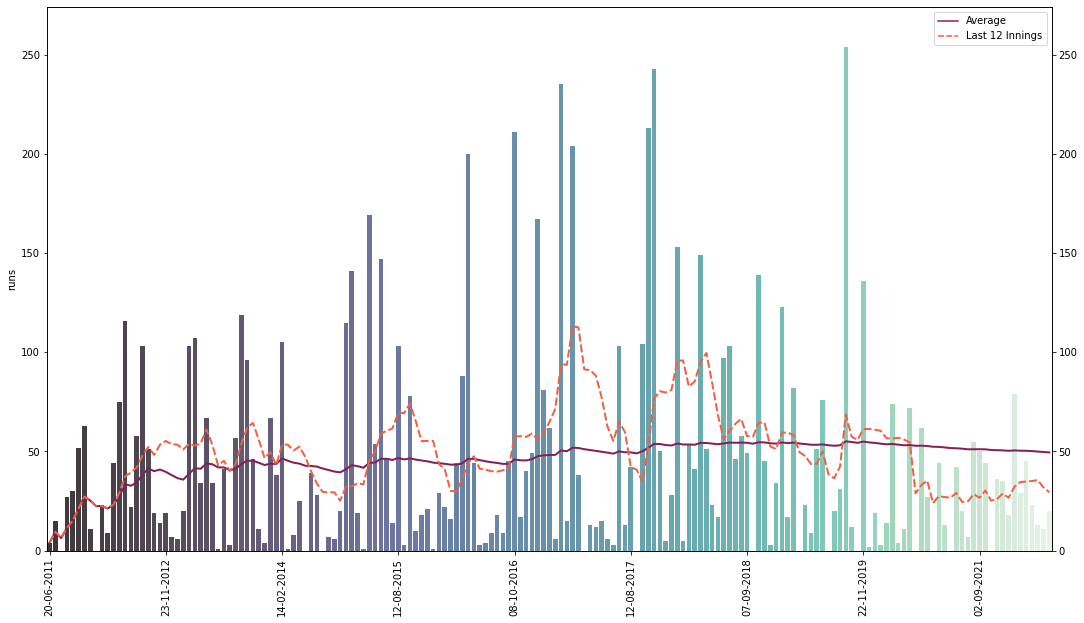

In [3]:
#gf.get_career_batting_graph(KOHLI_ID)

d:\Documents\Cricket\data_analysis\cricket_analytics\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '22-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


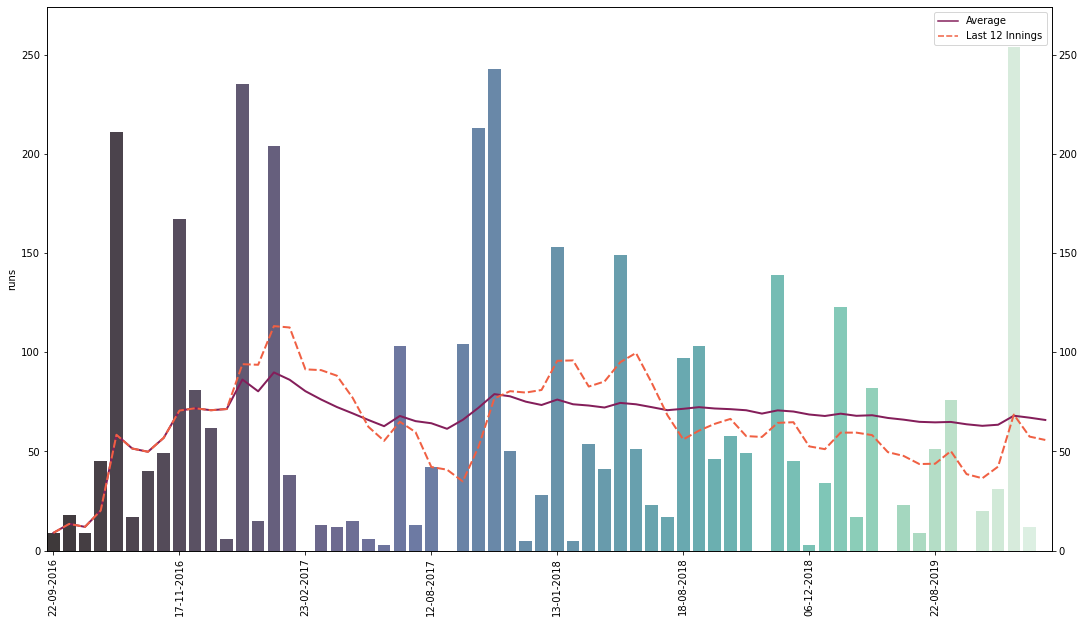

In [4]:
gf.get_career_batting_graph(KOHLI_ID, dates="08-10-2016:22-11-2019")

In [26]:
good_form_matches = wsf.get_player_match_list(KOHLI_ID, dates="2016-10-08:2019-10-10")
good_form_totals = af.get_cricket_totals(KOHLI_ID, matches=good_form_matches, _type='bat', by_innings=True, is_object_id=True)

In [27]:
good_form_totals

[{'inning': 1,
  'runs': 211,
  'balls_faced': 366,
  'fours': 20,
  'six': 0,
  'dot_balls': 223,
  'not_out': False,
  'how_out': 'lbw',
  'date': datetime.datetime(2016, 10, 8, 0, 0),
  'team': '6',
  'opposition': '5',
  'ground': '1055',
  'continent': 'Asia',
  'match_id': 1030217},
 {'inning': 3,
  'runs': 17,
  'balls_faced': 28,
  'fours': 1,
  'six': 0,
  'dot_balls': 15,
  'not_out': False,
  'how_out': 'lbw',
  'date': datetime.datetime(2016, 10, 8, 0, 0),
  'team': '6',
  'opposition': '5',
  'ground': '1055',
  'continent': 'Asia',
  'match_id': 1030217},
 {'inning': 2,
  'runs': 40,
  'balls_faced': 95,
  'fours': 5,
  'six': 0,
  'dot_balls': 71,
  'not_out': False,
  'how_out': 'hit_wicket',
  'date': datetime.datetime(2016, 11, 9, 0, 0),
  'team': '6',
  'opposition': '1',
  'ground': '2401',
  'continent': 'Asia',
  'match_id': 1034809},
 {'inning': 4,
  'runs': 49,
  'balls_faced': 98,
  'fours': 6,
  'six': 0,
  'dot_balls': 72,
  'not_out': True,
  'how_out': Fals

In [28]:
ave, tots = af.aggregate_batting_analysis(good_form_totals[0:24])

In [25]:
good_form_totals[23]

{'inning': 2,
 'overs': '1.1',
 'runs': 5,
 'dot_balls': 5,
 'wides': 0,
 'noballs': 0,
 'date': datetime.datetime(2017, 11, 16, 0, 0),
 'team': '6',
 'opposition': '8',
 'ground': '292',
 'continent': 'Asia',
 'match_id': 1122723}

In [29]:
ave

{'inning': 2.17,
 'runs': 68.71,
 'balls_faced': 104.75,
 'fours': 6.75,
 'six': 0.29,
 'dot_balls': 64.04,
 'not_out': 0.17,
 'match_id': 1064246.0}

In [30]:
tots

{'inning': 52,
 'runs': 1649,
 'balls_faced': 2514,
 'fours': 162,
 'six': 7,
 'dot_balls': 1537,
 'not_out': 4,
 'match_id': 25541904}

### Best period of form

Ok, we want to find Kohli's best period in tests. We will do this by calulating the average and run totals in each time period and then compare which period ends up being Kohli's best. First, lets determine what we want to consider as the minimum period. Lets say we think the minimum viable period is around series. Considering on average a series is 3 or so matches, we will consider the minimum period to be 5 innings.Any lower that this and its too small a sample size. Next let us consider the max period. This could be a long time. We frequently consider batsman that have good patches for 3-4 years at a time. Looking at Kohli however, we can say that 4 years looks a reasonable period to catch his longest period of good form.

min_period: 5
max_period 4 years, if Kohli playes 10 matches a year, that gives 80/90 as the longest period.

**How will we tackle this?**

What we will do is grab all matches first, to save time. Then we slice the matches by the time period we selected and then calculate the average and totals for each time period, we will store the results by beginning match index to index+period and then store this in a dict that will be organized by key being the period. Then finally can check what is the best average for each period.

In [6]:
def get_player_performances_in_periods(player_id, min_period, max_period = None, cricket_totals = None, _format='test', _type='bat'):
    """
    Returns the player stats in time periods defined by the minimum to maximum period lengths
    Note: player_id is object_id
    """
    if not max_period:
        max_period = min_period + 1
    
    periodic_stats = {}
    if not cricket_totals:
        matches = wsf.get_player_match_list(player_id, _format=_format)
        cricket_totals = af.get_cricket_totals(player_id, matches, _type=_type, by_innings=True, is_object_id=True)

    for period in range(min_period, max_period):    
        periodic_stats[period] = {}

        for i in range(len(cricket_totals)-period + 1):

            period_match_totals = cricket_totals[i:(i+period)]
            period_ave, period_tot = af.aggregate_batting_analysis(period_match_totals)
            periodic_stats[period][f'{i}:{i+period}'] = {'averages':period_ave, 'totals':period_tot, 'innings': period_match_totals}
    
    return periodic_stats


In [7]:
kohli_periodic_stats = get_player_performances_in_periods(KOHLI_ID, 5, 90, cricket_totals=all_totals)

Period 5
Setting values 0 - 5
Setting values 1 - 6
Setting values 2 - 7
Setting values 3 - 8
Setting values 4 - 9
Setting values 5 - 10
Setting values 6 - 11
Setting values 7 - 12
Setting values 8 - 13
Setting values 9 - 14
Setting values 10 - 15
Setting values 11 - 16
Setting values 12 - 17
Setting values 13 - 18
Setting values 14 - 19
Setting values 15 - 20
Setting values 16 - 21
Setting values 17 - 22
Setting values 18 - 23
Setting values 19 - 24
Setting values 20 - 25
Setting values 21 - 26
Setting values 22 - 27
Setting values 23 - 28
Setting values 24 - 29
Setting values 25 - 30
Setting values 26 - 31
Setting values 27 - 32
Setting values 28 - 33
Setting values 29 - 34
Setting values 30 - 35
Setting values 31 - 36
Setting values 32 - 37
Setting values 33 - 38
Setting values 34 - 39
Setting values 35 - 40
Setting values 36 - 41
Setting values 37 - 42
Setting values 38 - 43
Setting values 39 - 44
Setting values 40 - 45
Setting values 41 - 46
Setting values 42 - 47
Setting values 43

In [28]:
[kohli_periodic_stats[80][key]['averages']['runs'] for key in kohli_periodic_stats[80]]

[41.58,
 44.16,
 44.19,
 44.69,
 44.96,
 46.68,
 47.04,
 47.02,
 46.96,
 49.9,
 49.8,
 52.24,
 52.16,
 51.22,
 49.94,
 49.81,
 49.28,
 48.06,
 47.46,
 48.51,
 48.5,
 48.79,
 48.7,
 49.92,
 52.34,
 54.09,
 53.38,
 53.01,
 52.52,
 54.01,
 54.06,
 54.22,
 54.7,
 55.85,
 55.0,
 54.09,
 53.72,
 54.8,
 56.04,
 55.78,
 56.02,
 55.32,
 55.31,
 56.95,
 57.2,
 57.24,
 57.18,
 58.36,
 58.58,
 59.51,
 59.44,
 59.48,
 58.15,
 57.02,
 57.74,
 57.72,
 55.86,
 55.58,
 56.91,
 56.49,
 56.31,
 56.72,
 56.71,
 55.98,
 55.89,
 55.84,
 56.5,
 56.54,
 56.31,
 56.94,
 56.74,
 56.96,
 56.2,
 53.7,
 53.7,
 53.82,
 53.78,
 54.19,
 54.21,
 54.19,
 54.31,
 52.3,
 52.64,
 52.14,
 51.98,
 50.32,
 49.54,
 49.75,
 50.04,
 47.66,
 47.76,
 45.38,
 45.04,
 45.29]

In [31]:
max_ave_in_periods = [max(kohli_periodic_stats[period], key=lambda x: kohli_periodic_stats[period][x]['averages']['runs']) for period in kohli_periodic_stats]

In [32]:
max_ave_in_periods = [(kohli_periodic_stats[list(kohli_periodic_stats.keys())[i]][period]['averages']['runs'], period) for i,period in enumerate(max_ave_in_periods)]

In [36]:
maip = [x for x in zip([key for key in kohli_periodic_stats], max_ave_in_periods)]

In [35]:
def get_best_periods(player_id, min_period, max_period, display_key=None, stat_type='averages', stat='runs', lowest=False, _format='test', _type='bat', periodic_stats=None):
    if not periodic_stats:
        periodic_stats = get_player_performances_in_periods(player_id, min_period, max_period, _format=_format, _type=_type)

    agg_func = max
    if lowest:
        agg_func = min
    
    max_ave_in_periods = [max(periodic_stats[period], key=lambda x: periodic_stats[period][x][stat_type][stat]) for period in kohli_periodic_stats]
    max_ave_in_periods = [(kohli_periodic_stats[list(kohli_periodic_stats.keys())[i]][period][stat_type][stat], period) for i,period in enumerate(max_ave_in_periods)]
    return {x[0]:x[1] in zip([key for key in kohli_periodic_stats], max_ave_in_periods)}

We have the start and end inning of all the period, let us now graph them and we can see what if there is a distinctive period that was Kohli's best

In [61]:
points = sorted([(int(x),int(val[0])) for val in maip for x in val[1][1].split(':')], key=lambda x: x[0])

<AxesSubplot:>

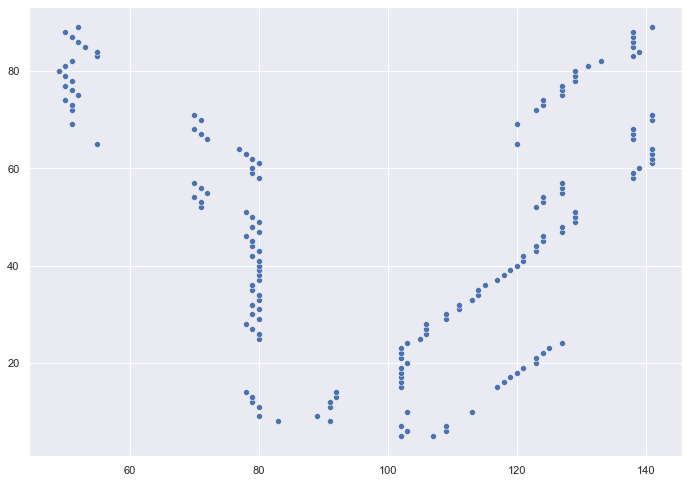

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot([p[0] for p in points], [p[1] for p in points])

In [66]:
all_totals[80]

{'inning': 1,
 'runs': 211,
 'balls_faced': 366,
 'fours': 20,
 'six': 0,
 'dot_balls': 223,
 'not_out': False,
 'how_out': 'lbw',
 'date': datetime.datetime(2016, 10, 8, 0, 0),
 'team': '6',
 'opposition': '5',
 'ground': '1055',
 'continent': 'Asia',
 'match_id': 1030217}

In [68]:
all_totals[125]

{'inning': 3,
 'runs': 34,
 'balls_faced': 104,
 'fours': 3,
 'six': 0,
 'dot_balls': 83,
 'not_out': False,
 'how_out': 'caught',
 'date': datetime.datetime(2018, 12, 6, 0, 0),
 'team': '6',
 'opposition': '2',
 'ground': '131',
 'continent': 'Oceania',
 'match_id': 1144993}